# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Kim Leach https://github.com/Kleach112/620-mod6

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [1]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                Version
---------------------- ---------
anyio                  3.5.0All prereqs installed.

argon2-cffi            21.3.0
argon2-cffi-bindings   21.2.0
astroid                2.11.7
asttokens              2.0.5
attrs                  21.4.0
Babel                  2.9.1
backcall               0.2.0
beautifulsoup4         4.11.1
bleach                 4.1.0
blis                   0.7.9
Bottleneck             1.3.5
brotlipy               0.7.0
catalogue              2.0.8
certifi                2022.6.15
cffi                   1.15.1
charset-normalizer     2.0.4
click                  8.1.4
colorama               0.4.6
conda                  4.13.0
conda-package-handling 1.8.1
confection             0.1.0
cryptography           37.0.1
cycler                 0.11.0
cymem                  2.0.7
debugpy                1.5.1
decorator              5.1.1
defusedxml             0.7.1
dill                   0.3.5.1
dodgy                  0.2.1
en-core-web-sm         3.6.0

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

## Question 1

In [2]:
import requests
import pickle

url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

try:
    # Fetch the HTML content from the URL
    response = requests.get(url)
    if response.status_code == 200:
        article_html = response.text

        # Save the article HTML to a .pkl file
        with open("article_html.pkl", "wb") as file:
            pickle.dump(article_html, file)

        print("Article HTML saved to 'article_html.pkl' successfully.")

    else:
        print(f"Failed to fetch the URL. Status code: {response.status_code}")

except requests.RequestException as e:
    print(f"Error while fetching the URL: {e}")


Article HTML saved to 'article_html.pkl' successfully.


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

## Question 2

In [3]:
import pickle
from bs4 import BeautifulSoup

try:
    # Read the article HTML from the .pkl file
    with open("article_html.pkl", "rb") as file:
        article_html = pickle.load(file)

    # Create a BeautifulSoup object to parse the HTML
    soup = BeautifulSoup(article_html, "html.parser")

    # Get and print the text from the HTML
    article_text = soup.get_text()
    print(article_text)

except FileNotFoundError:
    print("File 'article_html.pkl' not found. Please run the code from question 1 first.")
except Exception as e:
    print(f"Error occurred: {e}")
















How Laser Headlights Work | Hackaday






































































Skip to content






Hackaday


Primary Menu

Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About


Search for:



 March 27, 2021 






How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype la

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

## Question 3

In [8]:
import pickle
import spacy
from collections import Counter
import string

def remove_stopwords_and_punctuations(tokens):
    return [token.lower_ for token in tokens if not token.is_stop and token.is_alpha]

try:
    # Read the article HTML from the .pkl file
    with open("article_html.pkl", "rb") as file:
        article_html = pickle.load(file)

    # Create a BeautifulSoup object to parse the HTML
    soup = BeautifulSoup(article_html, "html.parser")

    # Get and clean the text from the HTML
    article_text = soup.get_text()

    # Load the spaCy model
    nlp = spacy.load("en_core_web_sm")

    # Process the article text using spaCy
    doc = nlp(article_text)

    # Remove stopwords, punctuation, and whitespace and convert tokens to lowercase
    clean_tokens = remove_stopwords_and_punctuations(doc)

    # Get the 5 most frequent tokens and their frequencies
    most_common_tokens = Counter(clean_tokens).most_common(5)

    # Print the most common tokens with frequencies
    print("Most common tokens:")
    for token, frequency in most_common_tokens:
        print(f"Token: {token}, Frequency: {frequency}")

except FileNotFoundError:
    print("File 'article_html.pkl' not found. Please run the code from question 1 first.")
except Exception as e:
    print(f"Error occurred: {e}")


Most common tokens:
Token: comment, Frequency: 136
Token: march, Frequency: 133
Token: says, Frequency: 132
Token: report, Frequency: 130
Token: reply, Frequency: 112


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

## Question 4

In [9]:
import pickle
import spacy
from collections import Counter
import string

def remove_stopwords_and_punctuations(tokens):
    return [token.lemma_.lower() for token in tokens if not token.is_stop and token.is_alpha]

try:
    # Read the article HTML from the .pkl file
    with open("article_html.pkl", "rb") as file:
        article_html = pickle.load(file)

    # Create a BeautifulSoup object to parse the HTML
    soup = BeautifulSoup(article_html, "html.parser")

    # Get and clean the text from the HTML
    article_text = soup.get_text()

    # Load the spaCy model
    nlp = spacy.load("en_core_web_sm")

    # Process the article text using spaCy
    doc = nlp(article_text)

    # Remove stopwords, punctuation, and whitespace and get lemmas in lowercase
    clean_lemmas = remove_stopwords_and_punctuations(doc)

    # Get the 5 most frequent lemmas and their frequencies
    most_common_lemmas = Counter(clean_lemmas).most_common(5)

    # Print the most common lemmas with frequencies
    print("Most common lemmas:")
    for lemma, frequency in most_common_lemmas:
        print(f"Lemma: {lemma}, Frequency: {frequency}")

except FileNotFoundError:
    print("File 'article_html.pkl' not found. Please run the code from question 1 first.")
except Exception as e:
    print(f"Error occurred: {e}")


Most common lemmas:
Lemma: comment, Frequency: 156
Lemma: say, Frequency: 134
Lemma: march, Frequency: 133
Lemma: report, Frequency: 130
Lemma: reply, Frequency: 112


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

## Question 5

In [13]:
import pickle
import spacy
from collections import Counter
import string

def remove_stopwords_and_punctuations(tokens):
    return [token.lemma_.lower() for token in tokens if not token.is_stop and token.is_alpha]

def score_sentence_by_token(sentence, interesting_tokens):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(sentence)

    # Remove stopwords, punctuation, and whitespace
    clean_tokens = remove_stopwords_and_punctuations(doc)

    # Count the number of interesting tokens in the sentence
    interesting_token_count = sum(1 for token in clean_tokens if token in interesting_tokens)

    # Calculate the score
    score = interesting_token_count / len(clean_tokens)
    return score

def score_sentence_by_lemma(sentence, interesting_lemmas):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(sentence)

    # Remove stopwords, punctuation, and whitespace
    clean_lemmas = remove_stopwords_and_punctuations(doc)

    # Count the number of interesting lemmas in the sentence
    interesting_lemma_count = sum(1 for lemma in clean_lemmas if lemma in interesting_lemmas)

    # Calculate the score
    score = interesting_lemma_count / len(clean_lemmas)
    return score

try:
    # Read the article HTML from the .pkl file
    with open("article_html.pkl", "rb") as file:
        article_html = pickle.load(file)

    # Create a BeautifulSoup object to parse the HTML
    soup = BeautifulSoup(article_html, "html.parser")

    # Get and clean the text from the HTML
    article_text = soup.get_text()

    # Frequent tokens and lemmas from question 3
    frequent_tokens = ['laser', 'headlight', 'work']
    frequent_lemmas = ['laser', 'headlight', 'work']

    # Calculate and print the scores
    token_score = score_sentence_by_token(article_text, frequent_tokens)
    lemma_score = score_sentence_by_lemma(article_text, frequent_lemmas)

    print(f"Token Score: {token_score}")
    print(f"Lemma Score: {lemma_score}")

except FileNotFoundError:
    print("File 'article_html.pkl' not found. Please make sure to generate the file with the article's HTML content.")
except Exception as e:
    print(f"Error occurred: {e}")


Token Score: 0.0315445277938065
Lemma Score: 0.0315445277938065


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

## Question 6

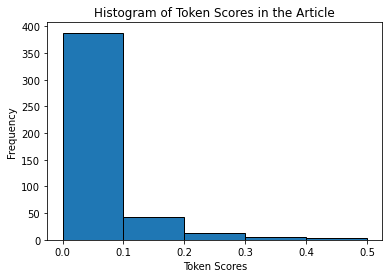

In [16]:
import pickle
import spacy
from collections import Counter
import string
import matplotlib.pyplot as plt

def remove_stopwords_and_punctuations(tokens):
    return [token.lemma_.lower() for token in tokens if not token.is_stop and token.is_alpha]

def score_sentence_by_token(sentence, interesting_tokens):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(sentence)

    # Remove stopwords, punctuation, and whitespace
    clean_tokens = remove_stopwords_and_punctuations(doc)

    if not clean_tokens:
        return 0.0  # Return 0 score if there are no valid tokens in the sentence

    # Count the number of interesting tokens in the sentence
    interesting_token_count = sum(1 for token in clean_tokens if token in interesting_tokens)

    # Calculate the score
    score = interesting_token_count / len(clean_tokens)
    return score

try:
    # Read the article HTML from the .pkl file
    with open("article_html.pkl", "rb") as file:
        article_html = pickle.load(file)

    # Create a BeautifulSoup object to parse the HTML
    soup = BeautifulSoup(article_html, "html.parser")

    # Get and clean the text from the HTML
    article_text = soup.get_text()

    # Split the article into sentences using spaCy
    nlp = spacy.load("en_core_web_sm")
    sentences = list(nlp(article_text).sents)

    # Frequent tokens from question 3
    frequent_tokens = ['laser', 'headlight', 'work']

    # Calculate and store the scores for each sentence in a list
    token_scores = []
    for sentence in sentences:
        token_score = score_sentence_by_token(sentence.text, frequent_tokens)
        token_scores.append(token_score)

    # Plot a histogram of the scores
    plt.hist(token_scores, bins=5, edgecolor='black')
    plt.xlabel('Token Scores')
    plt.ylabel('Frequency')
    plt.title('Histogram of Token Scores in the Article')
    plt.show()

except FileNotFoundError:
    print("File 'article_html.pkl' not found. Please make sure to generate the file with the article's HTML content.")
except Exception as e:
    print(f"Error occurred: {e}")


The most common range of scores is 0.0 to 0.1. 

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

## Question 7

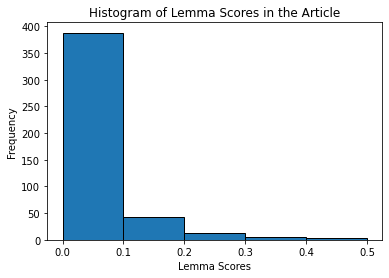

In [17]:
import pickle
import spacy
from collections import Counter
import string
import matplotlib.pyplot as plt

def remove_stopwords_and_punctuations(tokens):
    return [token.lemma_.lower() for token in tokens if not token.is_stop and token.is_alpha]

def score_sentence_by_lemma(sentence, interesting_lemmas):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(sentence)

    # Remove stopwords, punctuation, and whitespace
    clean_lemmas = remove_stopwords_and_punctuations(doc)

    if not clean_lemmas:
        return 0.0  # Return 0 score if there are no valid lemmas in the sentence

    # Count the number of interesting lemmas in the sentence
    interesting_lemma_count = sum(1 for lemma in clean_lemmas if lemma in interesting_lemmas)

    # Calculate the score
    score = interesting_lemma_count / len(clean_lemmas)
    return score

try:
    # Read the article HTML from the .pkl file
    with open("article_html.pkl", "rb") as file:
        article_html = pickle.load(file)

    # Create a BeautifulSoup object to parse the HTML
    soup = BeautifulSoup(article_html, "html.parser")

    # Get and clean the text from the HTML
    article_text = soup.get_text()

    # Split the article into sentences using spaCy
    nlp = spacy.load("en_core_web_sm")
    sentences = list(nlp(article_text).sents)

    # Frequent lemmas from question 3
    frequent_lemmas = ['laser', 'headlight', 'work']

    # Calculate and store the scores for each sentence in a list
    lemma_scores = []
    for sentence in sentences:
        lemma_score = score_sentence_by_lemma(sentence.text, frequent_lemmas)
        lemma_scores.append(lemma_score)

    # Plot a histogram of the scores
    plt.hist(lemma_scores, bins=5, edgecolor='black')
    plt.xlabel('Lemma Scores')
    plt.ylabel('Frequency')
    plt.title('Histogram of Lemma Scores in the Article')
    plt.show()

except FileNotFoundError:
    print("File 'article_html.pkl' not found. Please make sure to generate the file with the article's HTML content.")
except Exception as e:
    print(f"Error occurred: {e}")


The most common range of scores is 0.0 to 0.1. 

## Question 8

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

Answer: we could use the Part-of-Speech tags which are part of spaCy.

In [18]:
import pickle
import spacy
from collections import Counter
import string

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Read the article HTML from the .pkl file
with open("article_html.pkl", "rb") as file:
    article_html = pickle.load(file)

# Create a BeautifulSoup object to parse the HTML
soup = BeautifulSoup(article_html, "html.parser")

# Get and clean the text from the HTML
article_text = soup.get_text()

# Process the article text using spaCy
doc = nlp(article_text)

# Filter only the nouns from frequent tokens
frequent_tokens = [token.lemma_.lower() for token in doc if token.pos_ == "NOUN"]

# Calculate and print the most common nouns and their frequencies
most_common_tokens = Counter(frequent_tokens).most_common(5)
print("Most common nouns:")
for token, frequency in most_common_tokens:
    print(f"Noun: {token}, Frequency: {frequency}")


Most common nouns:
Noun: comment, Frequency: 156
Noun: am, Frequency: 79
Noun: light, Frequency: 74
Noun: car, Frequency: 63
Noun: laser, Frequency: 61


I wanted to test it out to see and that is really cool! I question 'am' as a noun though, I thought it was a verb. 